In [1]:
import matplotlib.pylab as plt
import seaborn as sns


sns.set_theme()
cmap = sns.color_palette('flare', as_cmap=True)

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

from sklego.meta import Thresholder

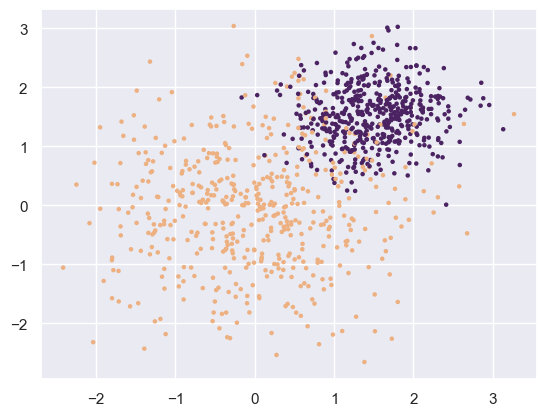

In [3]:
X, y = make_blobs(1000, centers=[(0,0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cmap);

In [9]:
%%time

pipe = Pipeline(
    [
        ("model", Thresholder(LogisticRegression(solver="lbfgs"), threshold=0.1))
    ]
)

mod = GridSearchCV(
    estimator=pipe,
    param_grid={"model__threshold": np.linspace(0.1, 0.9, 500)},
    scoring={
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "accuracy": make_scorer(accuracy_score)
    },
    refit="precision",
    cv=5
)

_ = mod.fit(X, y)

CPU times: total: 33.4 s
Wall time: 34.8 s


In [10]:
_

,estimator,Pipeline(step...eshold=0.1))])
,param_grid,"{'model__threshold': array([0.1 ..., 0.9 ])}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict')}"
,n_jobs,None
,refit,'precision'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,LogisticRegression()


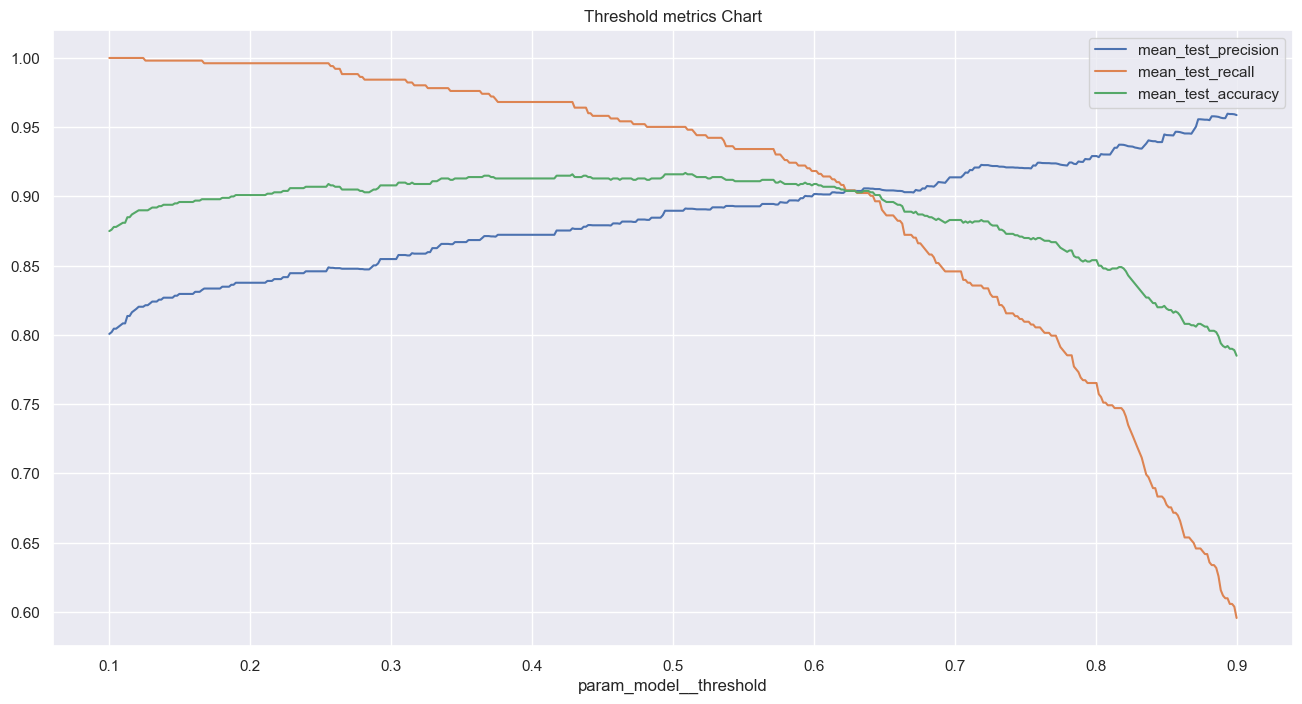

In [13]:
# threshold chart

(pd.DataFrame(mod.cv_results_)
.set_index("param_model__threshold")
[["mean_test_precision", "mean_test_recall", "mean_test_accuracy"]]
.plot(figsize=(16,8)))
plt.title("Threshold metrics Chart");